# Install Dependencies

## External Dependencies

In [1]:
!pip install pandas

## FrostAura Dependencies

In [2]:
import os
import sys

USE_LOCAL_CODE: bool = True # NOTE: When changing this configuration, be sure to restart the interpreter in order to have sys path updates reflect.
directories_to_move_up: int = 2
current_executing_path: str = os.getcwd()
current_executing_path = current_executing_path.replace('\\', '/')
root_path: str = '/'.join(current_executing_path.split('/')[:-directories_to_move_up])

# Clean up.
%pip uninstall frostaura -y
sys.path = [p for p in sys.path if p != root_path]

if USE_LOCAL_CODE:
    sys.path.append(root_path)
else:
    %pip install -U --no-cache-dir frostaura

Note: you may need to restart the kernel to use updated packages.


## Logging

In [3]:
import logging

logging.basicConfig(level=logging.DEBUG)

# Import Dependencies

In [4]:
from frostaura.engines import IAssetCalculationsEngine
from frostaura.engines import SimpleAssetCalculationsEngine
from frostaura.data_access import IResourcesDataAccess
from frostaura.data_access import EmbeddedResourcesDataAccess
from frostaura.data_access import IPersonalAssetDataAccess
from frostaura.data_access import EasyEquitiesPersonalAssetDataAccess
from frostaura.data_access import IPublicAssetDataAccess
from frostaura.data_access import YahooFinanceDataAccess

# Usage

In [5]:
public_asset_data_access: IPublicAssetDataAccess = YahooFinanceDataAccess()
instance: IAssetCalculationsEngine = SimpleAssetCalculationsEngine(public_asset_data_access=public_asset_data_access)
resource_data_access: IResourcesDataAccess = EmbeddedResourcesDataAccess()
personal_asset_data_access: IPersonalAssetDataAccess = EasyEquitiesPersonalAssetDataAccess(resource_data_access=resource_data_access,
                                                                         username=None,
                                                                         password=None)
holdings: list = personal_asset_data_access.get_personal_transactions()

In [6]:
instance.interpolate_holdings_profits(holdings=holdings)

DEBUG:root:Calculating profit for asset "TSLA".
INFO:root:Fetching historical price movements for symbol "TSLA".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/TSLA?period1=-631159200&period2=1660256995&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[TSLA] Processing transaction value $0.0688 on 2022-07-28 00:00:00.
DEBUG:root:Calculating profit for asset "AAPL".
INFO:root:Fetching historical price movements for symbol "AAPL".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/AAPL?period1=-631159200&period2=1660256996&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[AAPL] Processing transaction value $0.4317 on 2022-07-01 00:00:00.
DEBUG:root:Calculating

{'TSLA': {'name': 'Tesla Inc.',
  'symbol': 'TSLA',
  'transactions': [{'value': 0.0688,
    'date': datetime.datetime(2022, 7, 28, 0, 0),
    'usd': 57.97776083984375}],
  'total_purchased_usd': 57.97776083984375,
  'total_purchased_shares': 0.0688,
  'total_current_usd': 59.1604330078125,
  'total_profit_ratio': 1.999093157098042,
  'total_profit_usd': 1.1826721679687537},
 'AAPL': {'name': 'Apple Inc.',
  'symbol': 'AAPL',
  'transactions': [{'value': 0.4317,
    'date': datetime.datetime(2022, 7, 1, 0, 0),
    'usd': 59.89288125915527}],
  'total_purchased_usd': 59.89288125915527,
  'total_purchased_shares': 0.4317,
  'total_current_usd': 72.73713537139892,
  'total_profit_ratio': 17.658454717332962,
  'total_profit_usd': 12.844254112243654},
 'DDD': {'name': '3D Systems Corporation',
  'symbol': 'DDD',
  'transactions': [{'value': 8.8925,
    'date': datetime.datetime(2022, 8, 5, 0, 0),
    'usd': 112.13442194700241}],
  'total_purchased_usd': 112.13442194700241,
  'total_purchase

In [7]:
print(vars(instance.calculate_holdings_profit(holdings=holdings)))

DEBUG:root:Calculating overall holdings profits.
DEBUG:root:Calculating profit for asset "TSLA".
INFO:root:Fetching historical price movements for symbol "TSLA".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/TSLA?period1=-631159200&period2=1660257000&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[TSLA] Processing transaction value $0.0688 on 2022-07-28 00:00:00.
DEBUG:root:Calculating profit for asset "AAPL".
INFO:root:Fetching historical price movements for symbol "AAPL".
DEBUG:urllib3.connectionpool:Starting new HTTPS connection (1): query2.finance.yahoo.com:443
DEBUG:urllib3.connectionpool:https://query2.finance.yahoo.com:443 "GET /v8/finance/chart/AAPL?period1=-631159200&period2=1660257001&interval=1d&includePrePost=False&events=div%2Csplits HTTP/1.1" 200 None
DEBUG:root:[AAPL] Processing transaction value $0.43

{'percentage': 3.9789221530904584, 'value': 10.007553530406938}


In [12]:
logging.basicConfig(level=logging.CRITICAL)

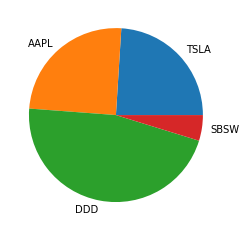

In [13]:
import matplotlib.pyplot as plt
import numpy as np

holding_ratios = instance.calculate_holdings_ratios(holdings=holdings)
labels: list = [k for k in holding_ratios]
ratios: list = [holding_ratios[k] for k in holding_ratios]

plt.pie(ratios, labels=labels)
plt.show() 